In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Problem 1

### data preparation

In [7]:
"""
    be sure to run this first as it prepares all dataframe to be used later
"""

data = pd.read_csv('train.csv')

# problem 1
sale_price_data = data['SalePrice']
lot_area_data = data['LotArea']
gr_liv_area_data = data['GrLivArea']
total_bsmt_sf_data = data['TotalBsmtSF']
garage_area_data = data['GarageArea']

# problem 2
ms_sub_class = data['MSSubClass']
neighborhood_data = data['Neighborhood']
bldg_type_data = data['BldgType']
overall_qual_data = data['OverallQual']

### Problem 1.a


In [58]:
"""
    The variable with most number of outliners is LotArea, it has 69 outliners
"""

def get_num_outliners(df):
    q_1 = df.describe()['25%']
    q_3 = df.describe()['75%']
    iqr = q_3 - q_1
    end = q_3 + iqr * 1.5
    start = q_1 - iqr * 1.5

    count = 0
    for d in df:
        if d < start or d > end:
            count += 1
    return count

print("Number of outliners(LotArea) - ", get_num_outliners(lot_area_data))
print("Number of outliners(GrLivArea) - ", get_num_outliners(gr_liv_area_data))
print("Number of outliners(TotalBsmtSF) - ", get_num_outliners(total_bsmt_sf_data))
print("Number of outliners(GarageArea) - ", get_num_outliners(garage_area_data))

Number of outliners(LotArea) -  69
Number of outliners(GrLivArea) -  31
Number of outliners(TotalBsmtSF) -  61
Number of outliners(GarageArea) -  21


### Problem 1.b

In [63]:
"""
    By using skew() function, LotArea has the highest skewness level which is around 12.21
"""

print("Skewness of LotArea - ", lot_area_data.skew())
print("Skewness of GrLivArea - ", gr_liv_area_data.skew())
print("Skewness of TotalBsmtSF - ", total_bsmt_sf_data.skew())
print("Skewness of GarageArea - ", garage_area_data.skew())

Skewness of LotArea -  12.207687851233496
Skewness of GrLivArea -  1.3665603560164552
Skewness of TotalBsmtSF -  1.5242545490627664
Skewness of GarageArea -  0.17998090674623907


### Problem 1.c

In [71]:
"""
    corr() function has been used in the question to determine the top two variables for predicting sale price
    from the tables below, we can see that GrLivArea and GarageArea have the higest correlation with sale price
"""

joint_lot_area = pd.concat([lot_area_data, sale_price_data], axis = 1).reindex(lot_area_data.index)
joint_lot_area.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


In [69]:
gr_liv_area = pd.concat([gr_liv_area_data, sale_price_data], axis = 1).reindex(gr_liv_area_data.index)
gr_liv_area.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [72]:
total_bsmt_sf = pd.concat([total_bsmt_sf_data, sale_price_data], axis = 1).reindex(total_bsmt_sf_data.index)
total_bsmt_sf.corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


In [73]:
garage_area = pd.concat([garage_area_data, sale_price_data], axis = 1).reindex(garage_area_data.index)
garage_area.corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


## Problem 2

### Problem 2.a

In [90]:
"""
    Firstly, i extract out the unique values in each variable and then perform a count, and able to get a result of
    Neighborhood having the most number of levels which is 25(as printed below)
    
    Then, for each variable, i compute the number of houses for each level. Results of which level having most number of
    houses in each variable has been printed below
"""

# retrieve levels
ms_sub_class_levels = ms_sub_class.unique()
neighborhood_levels = neighborhood_data.unique()
bldg_type_levels = bldg_type_data.unique()
overall_qual_levels = overall_qual_data.unique()
print("number of level(MSSubClass) - ", len(ms_sub_class_levels))
print("number of level(Neighborhood) - ", len(neighborhood_levels))
print("number of level(BldgType) - ", len(bldg_type_levels))
print("number of level(OverallQual) - ", len(overall_qual_levels))
print("----------------------------------")

def count_highest_house(col_name, levels):
    """for counting highest number of houses for each level in a column
    """
    highest = 0
    r_level = None
    for level in levels:
        count = len(data.loc[data[col_name] == level])
        if count > highest:
            highest = count
            r_level = level

    print(f"highest number of houses is {highest} in variable {col_name} is level '{r_level}'")

count_highest_house('MSSubClass', ms_sub_class_levels)
count_highest_house('Neighborhood', neighborhood_data)
count_highest_house('BldgType', bldg_type_data)
count_highest_house('OverallQual', overall_qual_data)

number of level(MSSubClass) -  15
number of level(Neighborhood) -  25
number of level(BldgType) -  5
number of level(OverallQual) -  10
----------------------------------
highest number of houses is 536 in variable MSSubClass is level '20'
highest number of houses is 225 in variable Neighborhood is level 'NAmes'
highest number of houses is 1220 in variable BldgType is level '1Fam'
highest number of houses is 397 in variable OverallQual is level '5'


### problem 2.b

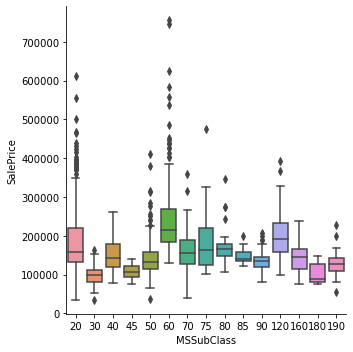

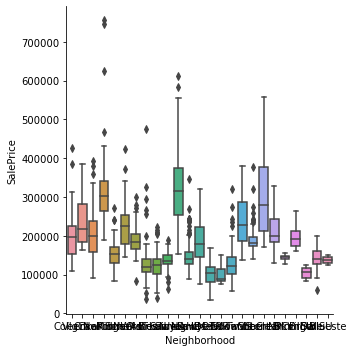

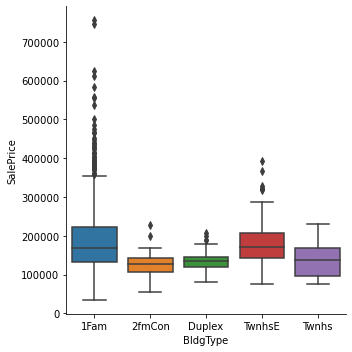

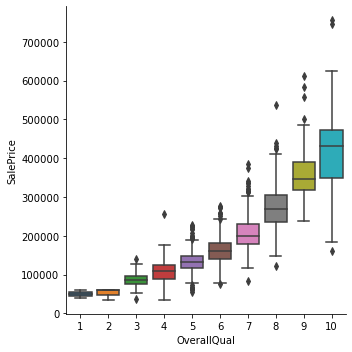

In [98]:
"""
    According to the boxplots below, we can first see that SalePrice increase as OverallQual increases which is an
    indication of SalePrice having a linear relationship with OverallQual, hence OverallQual will be my first pick.
    For the other three boxplots, they do not show any linear relationship, hence i will pick one that is with lowest 
    number of outliners, whereby in this case it should be BldgType.
    
    So i will pick OverallQual and BldgType
"""

sb.catplot(x='MSSubClass', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='Neighborhood', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='BldgType', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='OverallQual', 
            y='SalePrice',
            data=data,
            kind='box');

## Problem 3

### problem 3.a

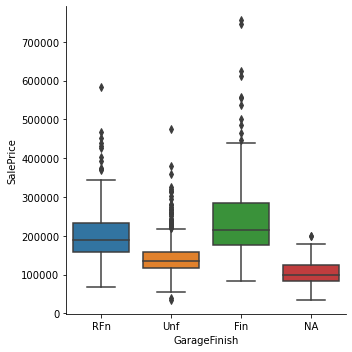

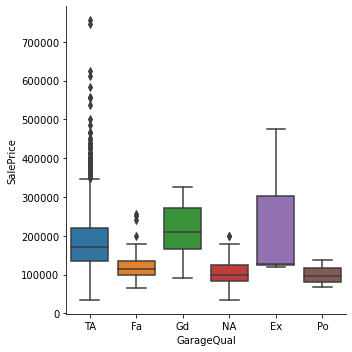

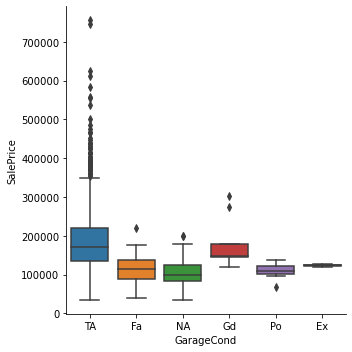

In [10]:
"""
    i think GarageFinish, GarageQual, GarageCond can provide a good gauge on whether having garage 
    has an impact on the sale price, because they are basically a measure of whether garage has been
    built in the house, and how good is the condition of the garage at the moment.
    
    because nan is a value that does not picked up by catplot, hence i replace all the nan with a constant
    string 'NA' and then plot the graphs.
    
    In all three botplots, the specific botplot which entail the distribution of 'NA' always lies at the bottom
    among all boxplots, and hence indicates that without garage, or with garage of poor condition the sale price
    of houses always tends to be lower than 
"""
# GarageFinish
# GarageQual
# GarageCond
data[['GarageFinish', 'GarageQual', 'GarageCond']] = data[['GarageFinish', 'GarageQual', 'GarageCond']].fillna(value='NA')

sb.catplot(x='GarageFinish', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='GarageQual', 
            y='SalePrice',
            data=data,
            kind='box');

sb.catplot(x='GarageCond', 
            y='SalePrice',
            data=data,
            kind='box');

In [9]:
data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)